<a href="https://colab.research.google.com/github/Reyourbae/2106019_muhammadRaihan_B/blob/main/Project_JST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy as sp
import itertools
import zipfile,os
import cv2

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop

print(tf.__version__)

2.15.0


Menyiapkan Direktory dan Dataset

In [20]:
base_dir = '/content/drive/MyDrive/JST/dataset/'
!ls "/content/drive/MyDrive/JST/dataset/"

bahan  latih  validasi


In [21]:
bahan_dir = os.path.join(base_dir,'bahan')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validasi')

In [22]:
hoddie_dir = os.path.join(bahan_dir, 'hoddie/')
sweater_dir = os.path.join(bahan_dir, 'sweater/')

print('Jumlah Gambar hoddie:', len(os.listdir(hoddie_dir)))
print('jumlah Gambar sweater:',len(os.listdir(sweater_dir)))

Jumlah Gambar hoddie: 512
jumlah Gambar sweater: 578


In [23]:
train_sweater = os.path.join(train_dir,'sweater/')
train_hoddie = os.path.join(train_dir,'hoddie/')

validation_sweater = os.path.join(validation_dir,'sweater/')
validation_hoddie = os.path.join(validation_dir,'hoddie/')

Augmentasi Gambar

In [26]:
dataset = '/content/drive/MyDrive/JST/dataset/bahan/'
datagen = ImageDataGenerator(rescale= 1./255,
                                   validation_split= 0.1,
                                   rotation_range = 30,
                                   shear_range = 0.3,
                                   zoom_range= 0.1,
                                   fill_mode = 'nearest',
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip=True)

training_generator = datagen.flow_from_directory(
    dataset,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset = 'training'
)

validation_generator = datagen.flow_from_directory(
    dataset,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset = 'validation'
)

Found 972 images belonging to 2 classes.
Found 107 images belonging to 2 classes.


Melatih Model Convolutional Neural Network dengan menggunakan keras

In [27]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(200, activation = 'relu'),
          tf.keras.layers.Dropout(0.3,seed=112),
          tf.keras.layers.Dense(500, activation = 'relu'),
          tf.keras.layers.Dropout(0.5,seed=112),
          tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

Model dan Alur Pelatihan

In [35]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.9:
            print('\nAkurasi Mencapai 90%')
            self.model.stop_training = True
callback = myCallback()

In [36]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [38]:
history = model.fit(
            training_generator,
            epochs= 10,
            validation_data=validation_generator,
            validation_steps= 1,
            verbose = 1
)

Epoch 1/10
31/31 [==============================] - 32s 1s/step - loss: 0.2622 - accuracy: 0.8940 - val_loss: 0.2752 - val_accuracy: 0.9062
Epoch 2/10
31/31 [==============================] - 32s 1s/step - loss: 0.2501 - accuracy: 0.9043 - val_loss: 0.1978 - val_accuracy: 0.9688
Epoch 3/10
31/31 [==============================] - 36s 1s/step - loss: 0.2436 - accuracy: 0.9064 - val_loss: 0.0591 - val_accuracy: 1.0000
Epoch 4/10
31/31 [==============================] - 32s 989ms/step - loss: 0.2468 - accuracy: 0.8992 - val_loss: 0.3394 - val_accuracy: 0.8750
Epoch 5/10
31/31 [==============================] - 32s 1s/step - loss: 0.2585 - accuracy: 0.9053 - val_loss: 0.1912 - val_accuracy: 0.9062
Epoch 6/10
31/31 [==============================] - 32s 1s/step - loss: 0.2221 - accuracy: 0.9228 - val_loss: 0.1497 - val_accuracy: 0.9062
Epoch 7/10
31/31 [==============================] - 33s 1s/step - loss: 0.2083 - accuracy: 0.9156 - val_loss: 0.1348 - val_accuracy: 0.9375
Epoch 8/10
31/31 

Evaluasi Model

In [39]:
score = model.evaluate(training_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

31/31 [==============================] - 20s 619ms/step - loss: 0.1768 - accuracy: 0.9414
Loss: 0.1768
Accuracy: 0.9414


In [40]:
score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

4/4 [==============================] - 2s 428ms/step - loss: 0.1854 - accuracy: 0.9346
Loss: 0.1854
Accuracy: 0.9346


plot kurva data latih dan validasi

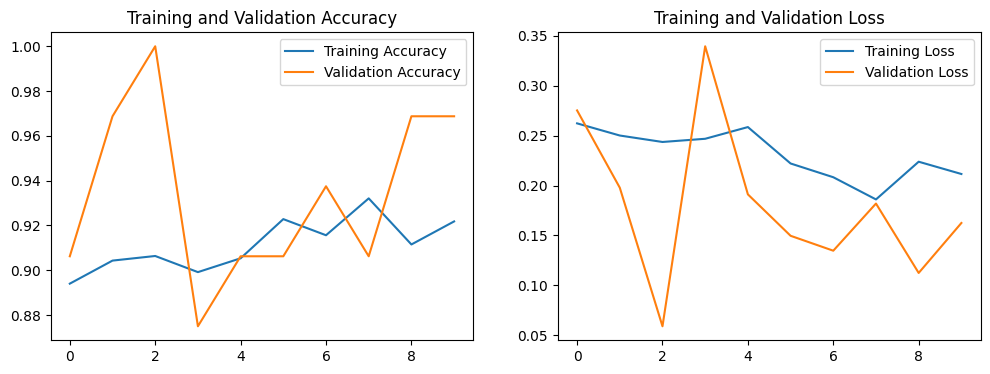

In [44]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot( acc, label='Training Accuracy')
plt.plot( val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

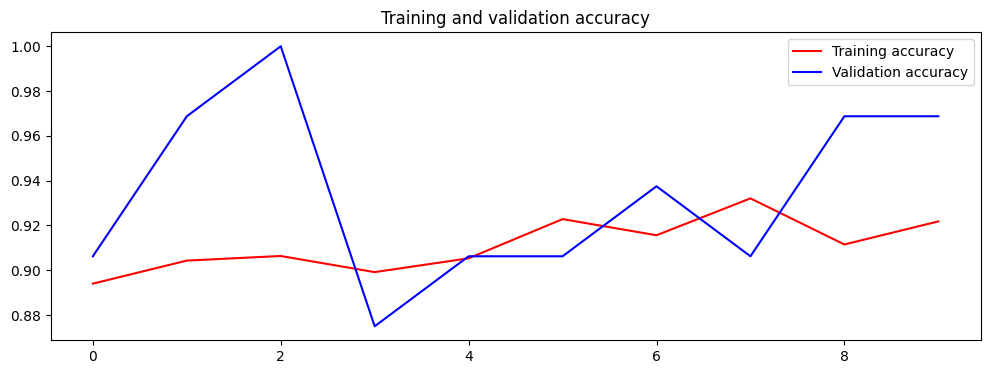

<Figure size 640x480 with 0 Axes>

In [45]:
acc2 = history.history['accuracy']
val_acc2 = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc2))

plt.figure(figsize=(12, 4))
plt.plot(epochs, acc2, 'r', label='Training accuracy')
plt.plot(epochs, val_acc2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='upper right')
plt.figure()


plt.show()

Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix
import numpy as np

Y_pred = model.predict(validation_generator)
y_pred = np.round(Y_pred).reshape(-1)

y_true = validation_generator.classes

confusion_mtx = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion_mtx)


4/4 [==============================] - 2s 388ms/step
Confusion Matrix:
[[31 20]
 [29 27]]


Clasification Report Dan Rekapitulasi Hasil Data

In [52]:
print('Classification Report')
target_names = ['hoddie', 'sweater']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      hoddie       0.52      0.61      0.56        51
     sweater       0.57      0.48      0.52        56

    accuracy                           0.54       107
   macro avg       0.55      0.54      0.54       107
weighted avg       0.55      0.54      0.54       107



In [54]:
import pandas as pd

evaluation = pd.DataFrame({'Model': [],
                           'Data_Train': [],
                           'Data_Valid': [],
                           'Epochs': [],
                           'Loss': [],
                           'Accuracy': []
})

r = evaluation.shape[0]
evaluation.loc[r] = ['CNN', training_generator.n, validation_generator.n, epochs, score[0], score[1]]
evaluation

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


,Model,Data_Train,Data_Valid,Epochs,Loss,Accuracy
0,CNN,972,107,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",0.185361,0.934579


In [56]:
dict = {"Model" : evaluation.Model,
        "Data Train" : evaluation.Data_Train,
        "Data Valid" : evaluation.Data_Valid,
        "Epochs" : evaluation.Epochs,
        "Loss" : evaluation.Loss,
        "Accuracy" : evaluation.Accuracy}

Prediksi Model Data yang ada dengan Upload Gambar

Saving WhatsApp Image 2024-01-11 at 01.19.29_ff0f61b3.jpg to WhatsApp Image 2024-01-11 at 01.19.29_ff0f61b3 (1).jpg
1/1 [==============================] - 0s 126ms/step
WhatsApp Image 2024-01-11 at 01.19.29_ff0f61b3 (1).jpg
Hoddie


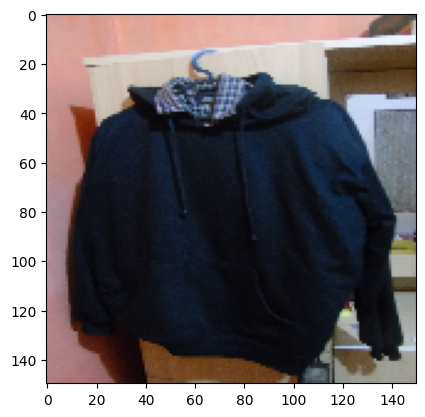

In [58]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():


  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)

  print(fn)
  if classes[0,0] == 1.0:
    print('Hoddie')
  elif classes[0,1] == 1.0:
    print('Sweater')